In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
#Import Dependecies
%matplotlib inline

#Data Manipulation
import pandas as pd
import numpy as np

#Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use("seaborn-whitegrid")

#Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [3]:
#Import train and test data
X_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
X_test_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
#View the training data
X_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X_full.shape

(1460, 81)

In [6]:
#View the test data (same columns as the training data)
X_test_full.head() # head = view first 5 lines


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
X_test_full.shape

(1459, 80)

In [8]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [9]:
X_full.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


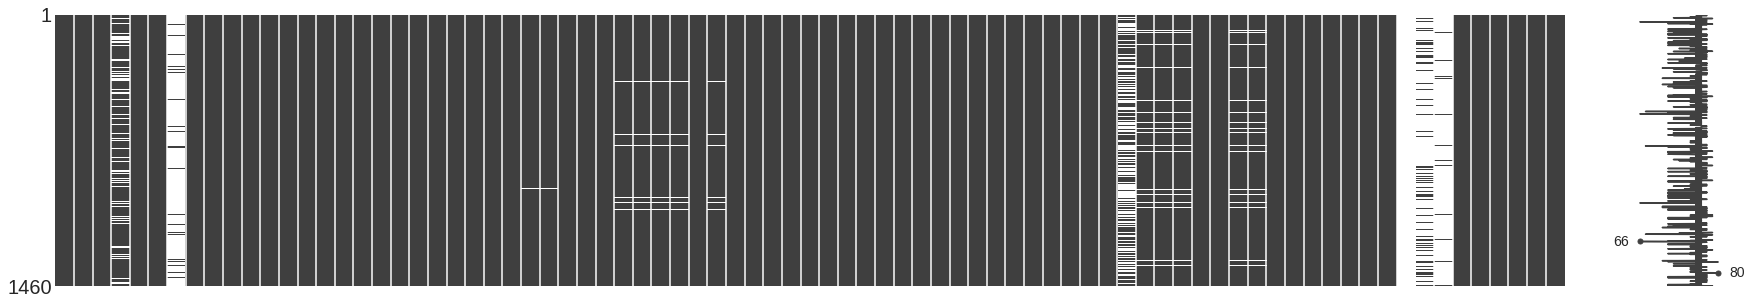

In [10]:
#Plot graphic of missing values
missingno.matrix(X_full, figsize = (30, 5))

Ok we can clearly see some missing values here. Columns with white spaces are the ones with missing values. It's important to visualize mising values early so you know
where the major holes are in your dataset. Knowing this information will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [11]:
#Let's write a little function to show us how many missing values there are

def find_missing_values(df, columns):
    """
    Find number of rows where certain columns have missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print ("Number of missing or Nan values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
    return missing_vals
    
missing_values = find_missing_values(X_full, columns=X_full.columns)
missing_values



Number of missing or Nan values for each column:


{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

**What datatypes are in the dataframe?**
As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints(numbers) could be
considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can lear from it.

Ideally, all the features will be encoded into a numerical value of some kind.

In [12]:
X_full.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

**Let's explore some of the features individually**
We will go through some columns iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

Target Feature: Sale Price
This is the variable we want our machine learning model to predict based off all the others.

Minimum Sale Price is: 34900
Maximum Sale Price is: 755000


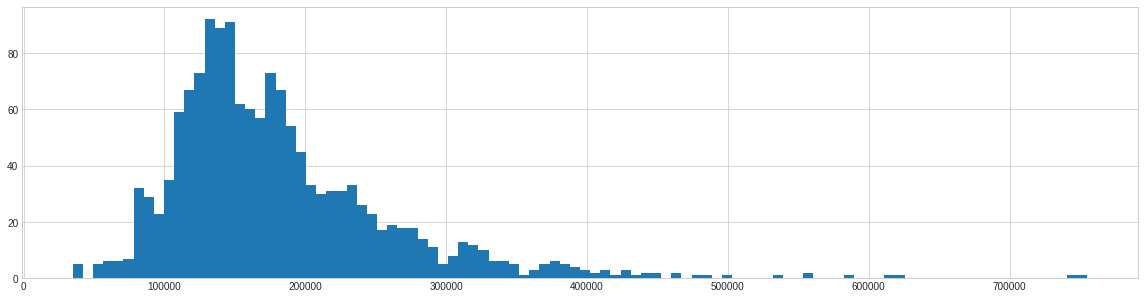

In [13]:
#What is sale price in the training data set?
fig = plt.figure(figsize = (20,5))
X_full['SalePrice'].hist(bins=100)
print("Minimum Sale Price is: {}".format(X_full['SalePrice'].min()))
print("Maximum Sale Price is: {}".format(X_full['SalePrice'].max()))


Minimum Year Built: 1872
Maximum Year Built: 2010


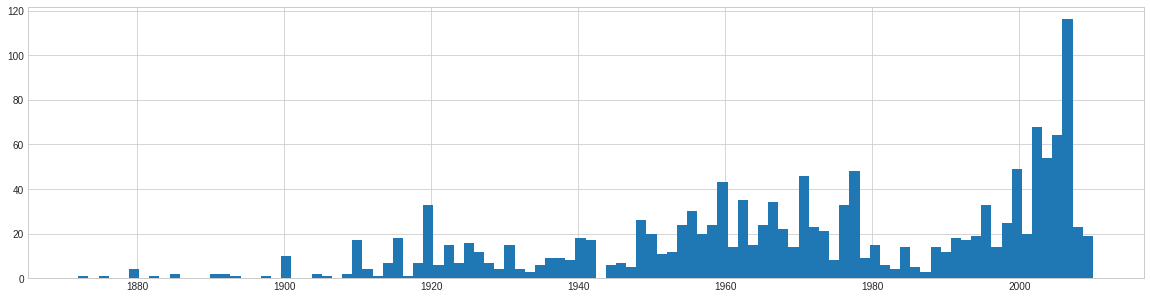

In [14]:
#When were the houses built?
fig = plt.figure(figsize =(20, 5))
X_full.YearBuilt.hist(bins=100)
print("Minimum Year Built: {}".format(X_full.YearBuilt.min()))
print("Maximum Year Built: {}".format(X_full.YearBuilt.max()))


USING XGBOOST FOR MACHINE LEARNING

In [15]:
#Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace = True)
y = X_full['SalePrice']
X_full.drop(['SalePrice'], axis=1, inplace=True)

In [16]:
#To keep things simple, we'll use only numerical predictors
#X = X_full.select_dtypes(exclude = ['object'])
#X_test = X_test_full.select_dtypes(exclude = ['object'])

In [17]:
#Select numeric columns only
numeric_cols = [cname for cname in X_full.columns if X_full[cname].dtype in ['int64', 'float64']]
X = X_full[numeric_cols].copy()
X_test = X_test_full[numeric_cols].copy()

In [18]:
X_test.isna().any().sum()

11

In [19]:
#Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [20]:
y_valid.dtypes

dtype('int64')

In [21]:
#Use the next code cell to impute missing values with the mean value along each column. Set the preprocesses Dataframes to imputed_X_train and imputed_X_valid.
#Make sure that the column names match those in X_train_full and X_valid_full
my_imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

In [22]:
#Fill in the lines below: Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns
imputed_X_test.columns = X_test.columns

In [23]:
imputed_X_valid.dtypes.unique()

array([dtype('float64')], dtype=object)

In [24]:
#X_test.isnull().any().sum()

Prediction and Selecting the Algorithm

In [25]:
#Define the model
my_model = XGBRegressor()

In [26]:
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]

In [27]:
##Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

#Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
     }

In [28]:
#Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=my_model, param_distributions = hyperparameter_grid,
                            cv = 5, n_iter = 50, 
                            scoring = 'neg_mean_absolute_error', n_jobs = 4,
                            verbose = 5,
                            return_train_score = True,
                            random_state = 42)

In [29]:
#fit the model
random_cv.fit(imputed_X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   54.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.7min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [30]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
my_model = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
my_model.fit(imputed_X_train, y_train)
prediction = my_model.predict(X_test)

output = pd.DataFrame({'Id':X_test_full.Id,
                      'SalePrice': prediction})
output.to_csv('submission.csv', index=False)

[15:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
